In [2]:
import numpy as np
import math
import time
from datetime import datetime, timezone
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
subjects_as_ints = [3509524, 5132496, 1066528, 5498603, 2638030, 2598705,
                    5383425, 1455390, 4018081, 9961348,1449548, 8258170,
                    781756, 9106476, 8686948, 8530312, 3997827, 4314139,
                    1818471, 4426783, 8173033, 7749105, 5797046, 759667,
                    8000685, 6220552, 844359, 9618981, 1360686, 46343,
                    8692923]

subjects_as_ints_min = [3509524, 5132496]

datetime_string = "2023-12-10 22:00:00"
dt = datetime.strptime(datetime_string, "%Y-%m-%d %H:%M:%S")
BASE_TIME = int(dt.replace(tzinfo=timezone.utc).timestamp())


# HeartRates

No missing values so no filling / dropping needed

## Load heartrates

In [4]:
def read_all_heart_rates(subjects):
    df = pd.DataFrame()
    for sub_id in subjects:
        sub_data = read_heart_rate(sub_id)
        df = pd.concat([df, sub_data], ignore_index=True)
    return df

def read_heart_rate(sub_id):
    data = pd.read_csv('data/heart_rate/' + str(sub_id) + '_heartrate.txt', delimiter=',').values
    time = data[:,0]
    time = BASE_TIME + time
    time = pd.to_datetime(time, unit='s')
    heart_rate = data[:,1]
    df = pd.DataFrame({'time': time, 'heart_rate': heart_rate, 'ID': sub_id})
    return df



In [5]:
heart_rates = read_all_heart_rates(subjects_as_ints)
print(heart_rates.head())
print(len(heart_rates))
print(heart_rates.isnull().sum())

                           time  heart_rate       ID
0 2023-12-03 22:15:01.180589914        77.0  3509524
1 2023-12-03 22:31:22.431269884        68.0  3509524
2 2023-12-03 22:37:45.806010008        65.0  3509524
3 2023-12-03 22:40:19.805700064        79.0  3509524
4 2023-12-03 22:45:49.965310097        71.0  3509524
254394
time          0
heart_rate    0
ID            0
dtype: int64


## Visualise heart rates

<AxesSubplot:ylabel='Frequency'>

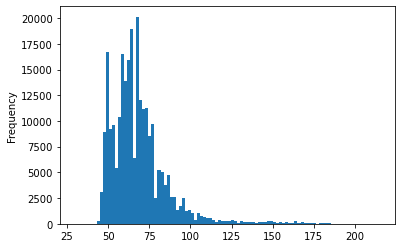

In [6]:
heart_rates['heart_rate'].plot.hist(bins=100)

In [7]:
print(heart_rates['heart_rate'].min())
print(heart_rates['heart_rate'].max())
print(heart_rates.nlargest(25, 'heart_rate'))

30.0
215.0
                                time  heart_rate       ID
165969 2023-12-04 21:01:35.263459921       215.0  4426783
165970 2023-12-04 21:01:39.263430119       215.0  4426783
105792 2023-12-11 06:26:48.491839886       212.0   781756
111789 2023-12-11 06:26:48.491839886       212.0   781756
117798 2023-12-11 06:26:48.491839886       212.0   781756
169669 2023-12-05 21:32:22.438829899       212.0  4426783
169670 2023-12-05 21:32:24.438829899       211.0  4426783
169671 2023-12-05 21:35:02.298199892       203.0  4426783
169672 2023-12-05 21:35:05.298170090       203.0  4426783
169673 2023-12-05 21:35:15.298199892       203.0  4426783
169666 2023-12-05 21:26:09.602859974       202.0  4426783
169667 2023-12-05 21:26:10.602859974       202.0  4426783
169660 2023-12-05 21:04:54.059890032       200.0  4426783
169661 2023-12-05 21:04:57.059920073       200.0  4426783
169659 2023-12-05 20:59:03.200550079       198.0  4426783
176361 2023-12-10 18:35:34.513839960       198.0  4426783
274

### Inspection Conclusions

Data seems to not contain significant outliers. Maximum heart rate is usually 220 - age, which would suggest that the observed largest values (over 200) are not reliable, but they should not cause any significant errors. There is also no clear gaps that would indicate the presense of outliers.

Here we might want to normalize data personwice, so that different levels of fitness do not skew statistics. For example someones resting heartrate could be 45 and other person could have resting heart rate of 70. In the end this is not good because some people excersiced duriong test and have much higher max HR.

Normalize data with minmax scaler.

In [8]:
# normalize_heartrate_minmax
scaler = MinMaxScaler()
heart_rates['heart_rate'] = scaler.fit_transform(heart_rates[['heart_rate']])


<AxesSubplot:ylabel='Frequency'>

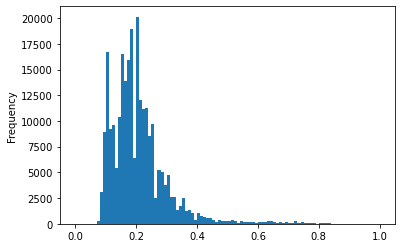

In [9]:
heart_rates['heart_rate'].plot.hist(bins=100)

In [10]:
print(heart_rates.head())
print(len(heart_rates))
print(heart_rates.isnull().sum())

                           time  heart_rate       ID
0 2023-12-03 22:15:01.180589914    0.254054  3509524
1 2023-12-03 22:31:22.431269884    0.205405  3509524
2 2023-12-03 22:37:45.806010008    0.189189  3509524
3 2023-12-03 22:40:19.805700064    0.264865  3509524
4 2023-12-03 22:45:49.965310097    0.221622  3509524
254394
time          0
heart_rate    0
ID            0
dtype: int64


## Save heart_rates

In [11]:
heart_rates.to_csv('heart_rates.csv', index=False)

# steps

## Load steps

In [12]:
def read_all_steps(subjects):
    df = pd.DataFrame()
    for sub_id in subjects:
        sub_data = read_steps(sub_id)
        df = pd.concat([df, sub_data], ignore_index=True)
    return df

def read_steps(sub_id):
    data = pd.read_csv('data/steps/' + str(sub_id) + '_steps.txt', delimiter=',').values
    time = data[:,0]
    time = BASE_TIME + time
    time = pd.to_datetime(time, unit='s')
    steps = data[:,1]
    df = pd.DataFrame({'time': time, 'steps': steps, 'ID': sub_id})
    return df

In [13]:
steps = read_all_steps(subjects_as_ints)
print(steps.head())
print(len(steps))
print(steps.isnull().sum())

                 time  steps       ID
0 2023-12-03 22:10:02    139  3509524
1 2023-12-03 22:20:02    110  3509524
2 2023-12-03 22:30:02     20  3509524
3 2023-12-03 22:40:02      9  3509524
4 2023-12-03 22:50:02      0  3509524
33428
time     0
steps    0
ID       0
dtype: int64


## Steps visualizations

<AxesSubplot:ylabel='Frequency'>

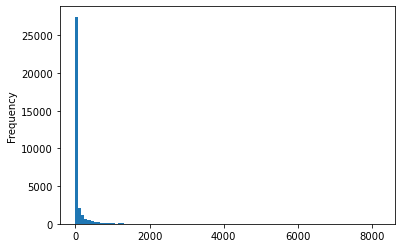

In [14]:
steps['steps'].plot.hist(bins=100)


In [15]:
print(steps['steps'].min())
print(steps['steps'].max())
print(steps.nlargest(20, 'steps'))

0
8198
                     time  steps       ID
1452  2023-12-07 00:10:25   8198  5132496
203   2023-12-05 08:00:02   6409  3509524
7237  2023-12-07 16:06:44   4806  5383425
5991  2023-12-07 15:43:15   4138  2598705
47    2023-12-04 06:00:02   3649  3509524
5844  2023-12-06 15:13:15   3163  2598705
18870 2023-12-09 11:21:12   3155  4314139
18144 2023-12-04 10:21:12   3152  4314139
5845  2023-12-06 15:23:15   3126  2598705
18440 2023-12-06 11:41:12   3094  4314139
18869 2023-12-09 11:11:12   3086  4314139
18441 2023-12-06 11:51:12   3078  4314139
5990  2023-12-07 15:33:15   3074  2598705
18442 2023-12-06 12:01:12   3049  4314139
18439 2023-12-06 11:31:12   3042  4314139
18145 2023-12-04 10:31:12   3027  4314139
18146 2023-12-04 10:41:12   3027  4314139
18143 2023-12-04 10:11:12   2978  4314139
18141 2023-12-04 09:51:12   2929  4314139
22533 2023-12-05 08:03:13   2924  7749105


## Conclusion

There seems to be some values with very high step counts per 10 minutes. Average running speed is 5ms/s => 300m / min => 3000m / 10min. The steps should be counted every 10 minutes. one step is around 0.7m, and for running it should be slightly larger. Therefore counts like 8000 or 6000 steps / 10min are potentially errors. However with the largest step count 8000, there seems to be high heart rate as well at the same time, suggesting some kind of physical activity.

Having few values with very high step counts should not be relevant for our analysis, since there are not enough data to draw any conclusions. As we want to normalize the data, we will remove the largest values as outliers. Therefore values qith larger than 1000 steps are removed (8 rows).

Potentially transform data with np.log1p and then use minmaxScaler

In [16]:
ids = [1452, 203, 7237, 5991]
mean_steps = steps['steps'].mean()
print(mean_steps)
for i in ids:
    steps['steps'].at[i] = mean_steps

72.02521837980136


0
3649


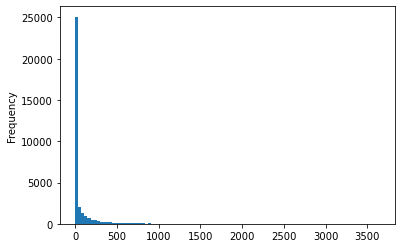

In [17]:
steps['steps'].plot.hist(bins=100)
print(steps['steps'].min())
print(steps['steps'].max())

## Save steps

In [18]:
steps.to_csv('steps.csv')

## Sleep labels

In [19]:
def read_all_sleep_labels(subjects):
    df = pd.DataFrame()
    for sub_id in subjects:
        sub_data = read_sleep_labels(sub_id)
        df = pd.concat([df, sub_data], ignore_index=True)
    return df

def read_sleep_labels(sub_id):
    data = pd.read_csv('data/labels/' + str(sub_id) + '_labeled_sleep.txt', delimiter=' ').values
    time = data[:,0]
    time = BASE_TIME + time
    time = pd.to_datetime(time, unit='s')
    df = pd.DataFrame({'time': time, 'sleep': data[:,1], 'ID': sub_id})
    return df

In [20]:
labels = read_all_sleep_labels(subjects_as_ints)
print(labels.head())
print(len(labels))
print(labels.isnull().sum())

                 time  sleep       ID
0 2023-12-10 22:00:30      0  3509524
1 2023-12-10 22:01:00      0  3509524
2 2023-12-10 22:01:30      0  3509524
3 2023-12-10 22:02:00      0  3509524
4 2023-12-10 22:02:30      0  3509524
27180
time     0
sleep    0
ID       0
dtype: int64


-1
5


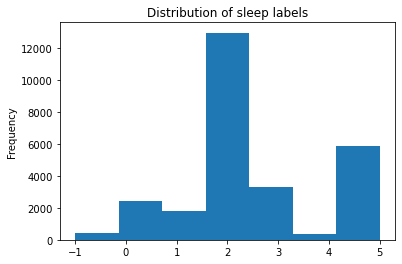

In [22]:
labels['sleep'].plot.hist(bins=7, title='Distribution of sleep labels')
print(labels['sleep'].min())
print(labels['sleep'].max())

subject id: 46343
plotted
plotting


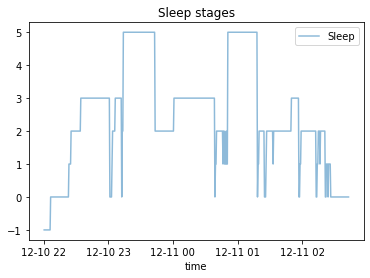

showed


In [24]:
#extra visualization
for _, (subject_id, subject_labels) in enumerate(labels.groupby('ID')):

    print('subject id: {}'.format(subject_id))
    start = subject_labels['time'].min()
    end = subject_labels['time'].max()
    
    plt.figure()
    plt.plot(subject_labels['time'], subject_labels['sleep'], label='Sleep', alpha=0.5)
    plt.xlabel('time')
    plt.title('Sleep stages')
    plt.legend()
    print('plotted')
    break
print('plotting')
plt.show()
print('showed')

## Save sleep labels

In [163]:
labels.to_csv('labels.csv', index=False)

# Acceleration

Also calculate total acceleration based on vector calculations.

In [26]:
def read_all_accelerations(subjects):
    df = pd.DataFrame()
    for sub_id in subjects:
        sub_data = read_acceleration(sub_id)
        df = pd.concat([df, sub_data], ignore_index=True)
    return df

def read_acceleration(sub_id):
    data = pd.read_csv('data/motion/' + str(sub_id) + '_acceleration.txt', delimiter=' ').values
    time = data[:,0]
    time = BASE_TIME + time
    time = pd.to_datetime(time, unit='s')
    df = pd.DataFrame({'time': time, 'x': data[:,1], 'y': data[:, 2], 'z': data[:,3], 'ID': sub_id})
    df['total'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
    return df

In [27]:
accelerations = read_all_accelerations(subjects_as_ints)
print(accelerations.head())
print(len(accelerations))
print(accelerations.isnull().sum())

                           time         x         y         z       ID  \
0 2023-12-10 15:16:07.036429882  0.042816  0.117325 -0.993820  3509524   
1 2023-12-10 15:16:07.036827087  0.051605  0.113922 -0.993637  3509524   
2 2023-12-10 15:16:07.037204027  0.057892  0.115890 -0.991074  3509524   
3 2023-12-10 15:16:07.052771091  0.052109  0.118805 -0.995087  3509524   
4 2023-12-10 15:16:07.073024988  0.047256  0.118301 -0.996155  3509524   

      total  
0  1.001637  
1  1.001477  
2  0.999504  
3  1.003508  
4  1.004267  
51819120
time     0
x        0
y        0
z        0
ID       0
total    0
dtype: int64


## Acceleration visualizations


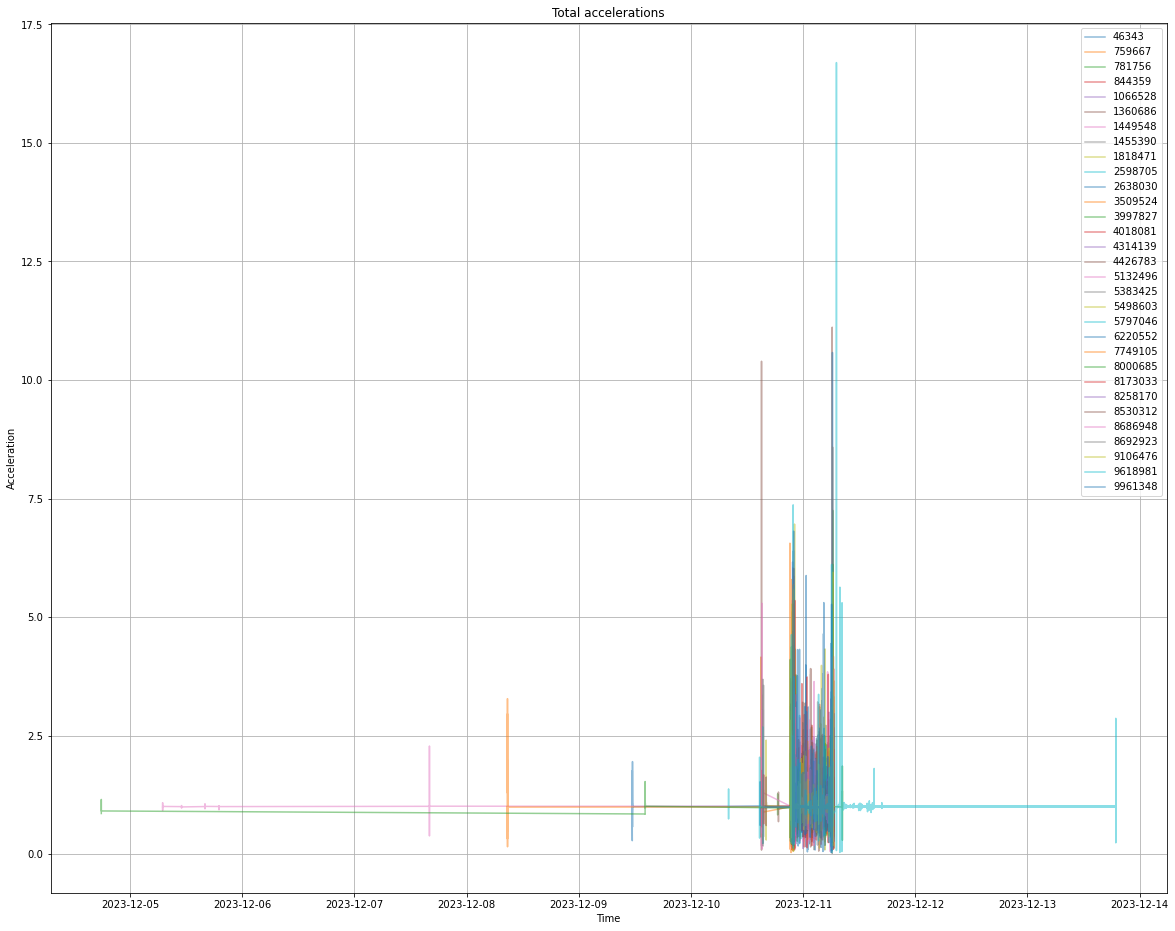

In [28]:
plt.figure(figsize=(20, 16))

for _, (group_id, group_data) in enumerate(accelerations.groupby('ID')):
    plt.plot(group_data['time'], group_data['total'], label=group_id, alpha=0.5)

plt.title('Total accelerations')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

## Visualization conclusion

There is data that is not recorded during PSG => remove those

## Remove data outside PSG

In [29]:
def crop_extra(data):
    df = pd.DataFrame()
    for _, (subject_id, subject_labels) in enumerate(labels.groupby('ID')):
        print('subject_id: {}'.format(subject_id))
        start = subject_labels['time'].min()
        end = subject_labels['time'].max()
        print('start: {}, end: {}'.format(start, end))
        condition1 = data['ID'] == subject_id
        condition2 = data['time'] >= start
        condition3 = data['time'] <= end
        filtered = data[(condition1 & condition2 & condition3)]
        og = data[condition1]
        print('Number of datapoints: {}'.format(len(filtered)))
        print('percentage of original: {}'.format(len(filtered) / len(og)))
        df = pd.concat([df, filtered], ignore_index=True)
    return df


In [30]:
accelerations = crop_extra(accelerations)

subject_id: 46343
start: 2023-12-10 22:00:30, end: 2023-12-11 02:43:00
Number of datapoints: 848520
percentage of original: 0.8640741996682277
subject_id: 759667
start: 2023-12-10 22:00:30, end: 2023-12-11 01:57:00
Number of datapoints: 869030
percentage of original: 0.7315073497536614
subject_id: 781756
start: 2023-12-10 22:00:30, end: 2023-12-11 06:10:00
Number of datapoints: 1465438
percentage of original: 0.9351875782945618
subject_id: 844359
start: 2023-12-10 22:00:30, end: 2023-12-11 05:54:00
Number of datapoints: 1415803
percentage of original: 0.9723928381818944
subject_id: 1066528
start: 2023-12-10 22:00:30, end: 2023-12-11 05:55:30
Number of datapoints: 1186403
percentage of original: 0.9261545090979775
subject_id: 1360686
start: 2023-12-10 22:00:30, end: 2023-12-11 06:03:30
Number of datapoints: 1383532
percentage of original: 0.8882232094707377
subject_id: 1449548
start: 2023-12-10 22:00:30, end: 2023-12-11 06:02:00
Number of datapoints: 1618957
percentage of original: 0.89

In [31]:
acc_initial_l = 51819120
removed = acc_initial_l - len(accelerations)
print('Number of removed data: {}'.format(removed))
print('percentage: {}'.format((removed / acc_initial_l)*100))

Number of removed data: 12777169
percentage: 24.657248135437268


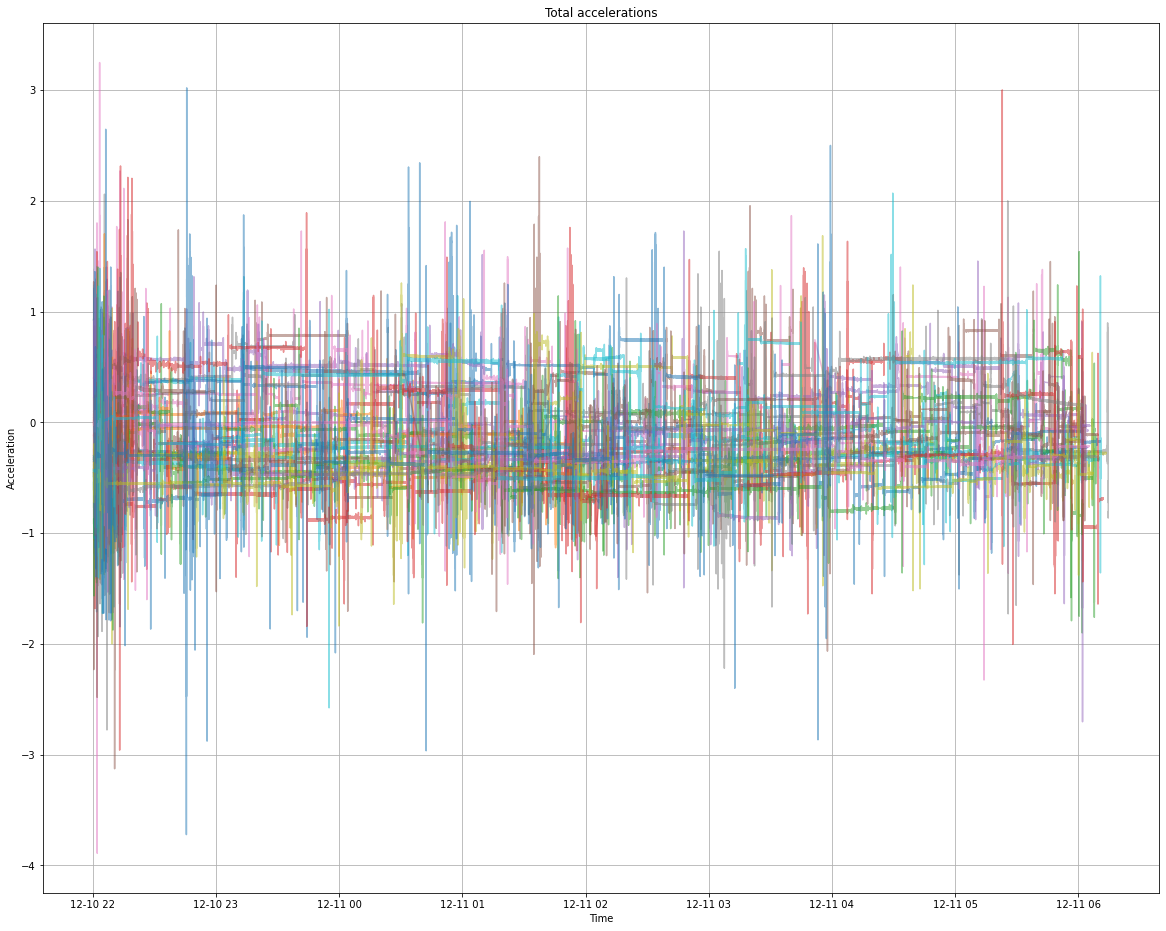

In [32]:
plt.figure(figsize=(20, 16))

for _, (group_id, group_data) in enumerate(accelerations.groupby('ID')):
    plt.plot(group_data['time'], group_data['x'], label=group_id, alpha=0.5)

plt.title('Total accelerations')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.grid(True)
plt.show()

## Acceleration distributions

0.047796572441546475
6.960829266055448


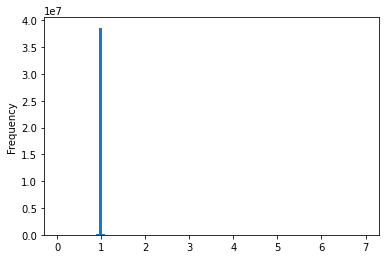

In [33]:
accelerations['total'].plot.hist(bins=100)
print(accelerations['total'].min())
print(accelerations['total'].max())

-3.8899993999999998
3.2482757999999996


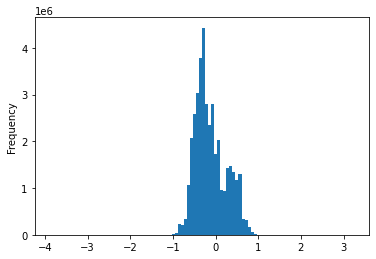

In [34]:
accelerations['x'].plot.hist(bins=100)
print(accelerations['x'].min())
print(accelerations['x'].max())

-4.8703613
6.879562400000001


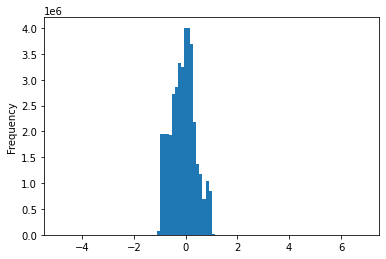

In [35]:
accelerations['y'].plot.hist(bins=100)
print(accelerations['y'].min())
print(accelerations['y'].max())

-4.0680542
3.8670044000000003


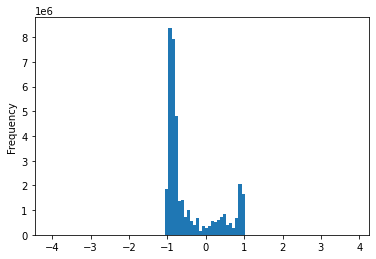

In [36]:
accelerations['z'].plot.hist( bins=100)
print(accelerations['z'].min())
print(accelerations['z'].max())

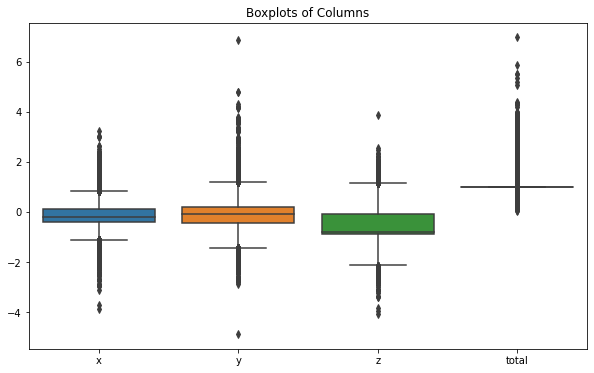

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = accelerations[['x', 'y', 'z', 'total']])
plt.title('Boxplots of Columns')
plt.show()

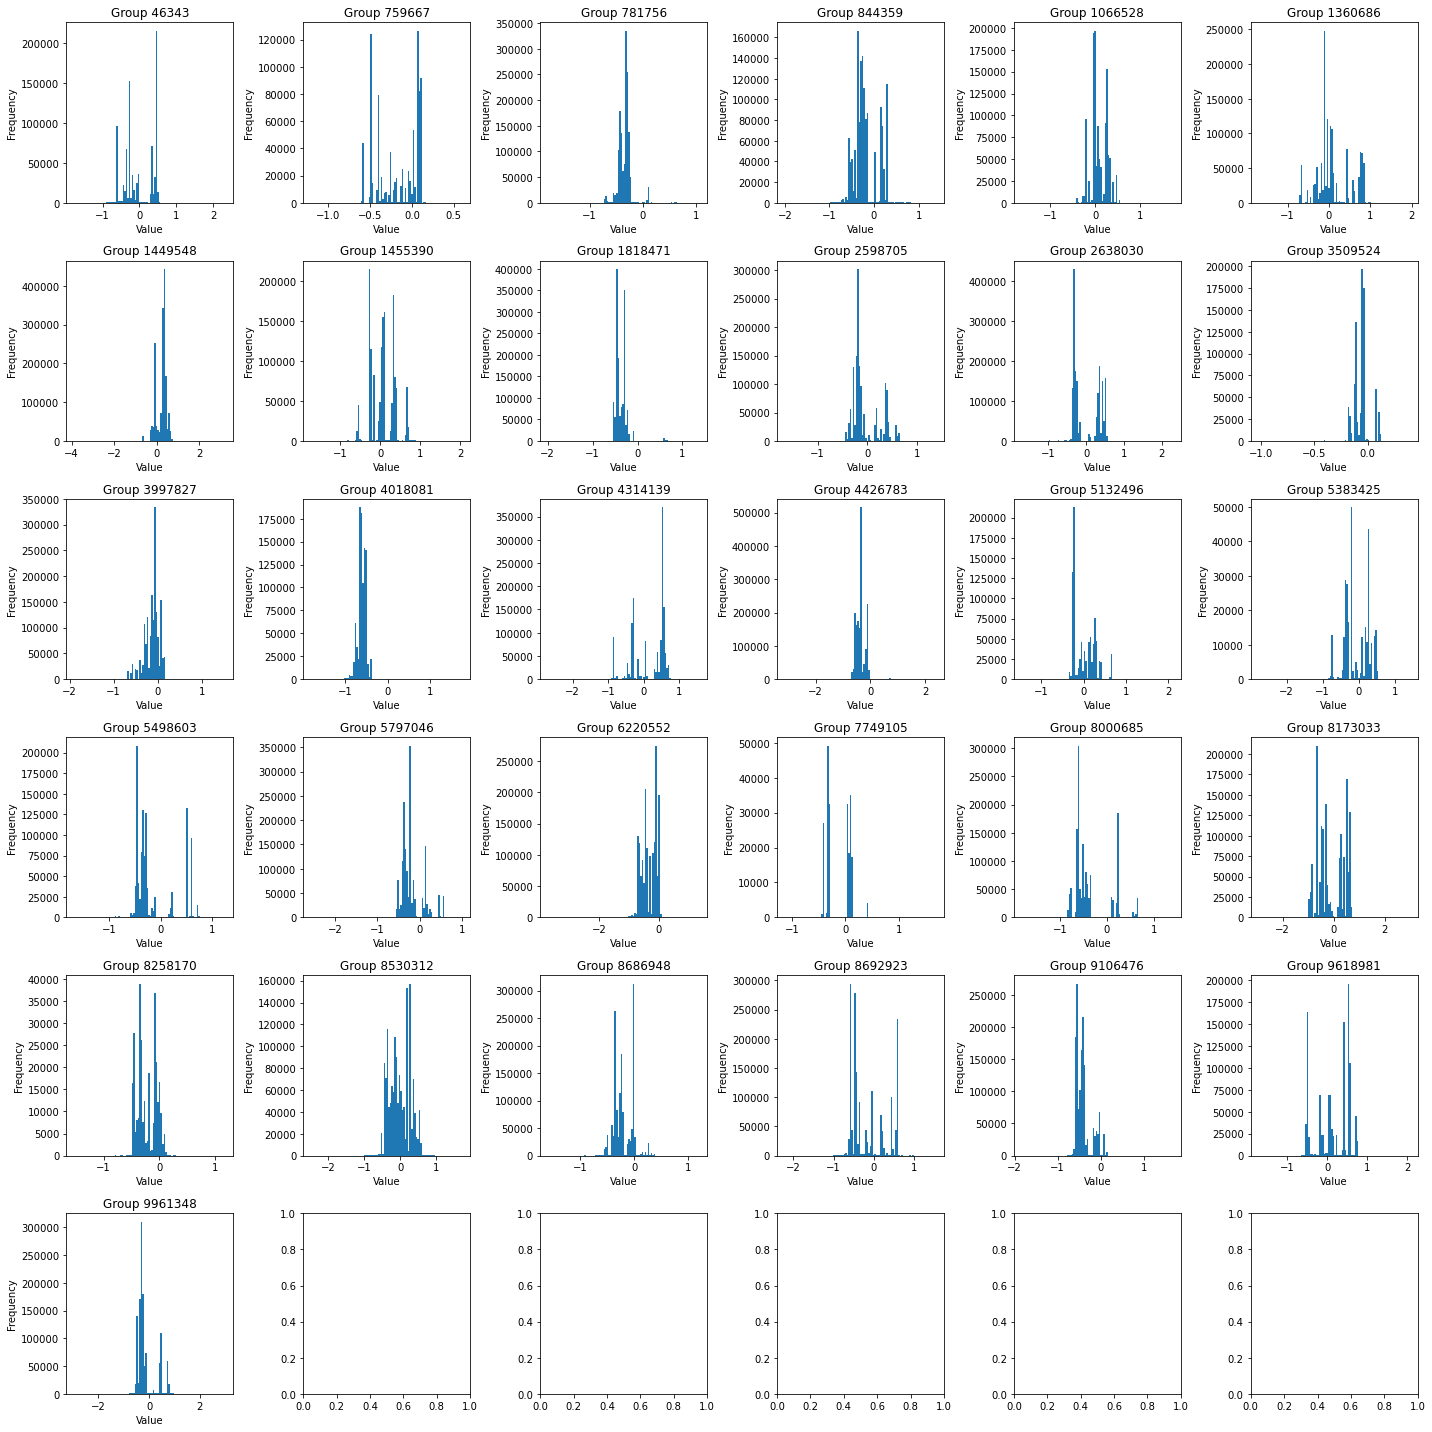

In [38]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
axe = axes.ravel()
for idx, (group_id, group_data) in enumerate(accelerations.groupby('ID')):
    ax = axe[idx]
    group_data['x'].plot.hist(bins=100, ax=ax, title=f'Group {group_id}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## acceleration distribution conclusions

total column is not useful => remove that

Data is not symmetrical, cant use methods like IQR for removing outliers

In [39]:
accelerations = accelerations.drop('total', axis=1)

### Remove outliers with percentile based trimming

In [40]:
# Percentile based trimming
def remove_outliers_trim(data, column):
    lower = data[column].quantile(0.0001)
    upper = data[column].quantile(0.999)
    print('Lower: {}, upper: {}'.format(lower, upper))
    filtered = data[(data[column] >= lower) & (data[column] <= upper)]
    return filtered

In [41]:
accelerations = remove_outliers_trim(accelerations, 'x')
accelerations = remove_outliers_trim(accelerations, 'y')
accelerations = remove_outliers_trim(accelerations, 'z')

Lower: -1.0162811, upper: 0.8295898000000002
Lower: -1.1028748, upper: 0.9860382
Lower: -1.2297516000000002, upper: 1.0047760000000001


In [42]:
acc_initial_l = 51819120 - 12777169
acc_removed = acc_initial_l - len(accelerations)
print('number of removed rows: {}, ({}%)'.format(acc_removed, round((acc_removed / acc_initial_l)*100,2)))
print('number of remaining rows: {}'.format(len(accelerations)))

number of removed rows: 128142, (0.33%)
number of remaining rows: 38913809


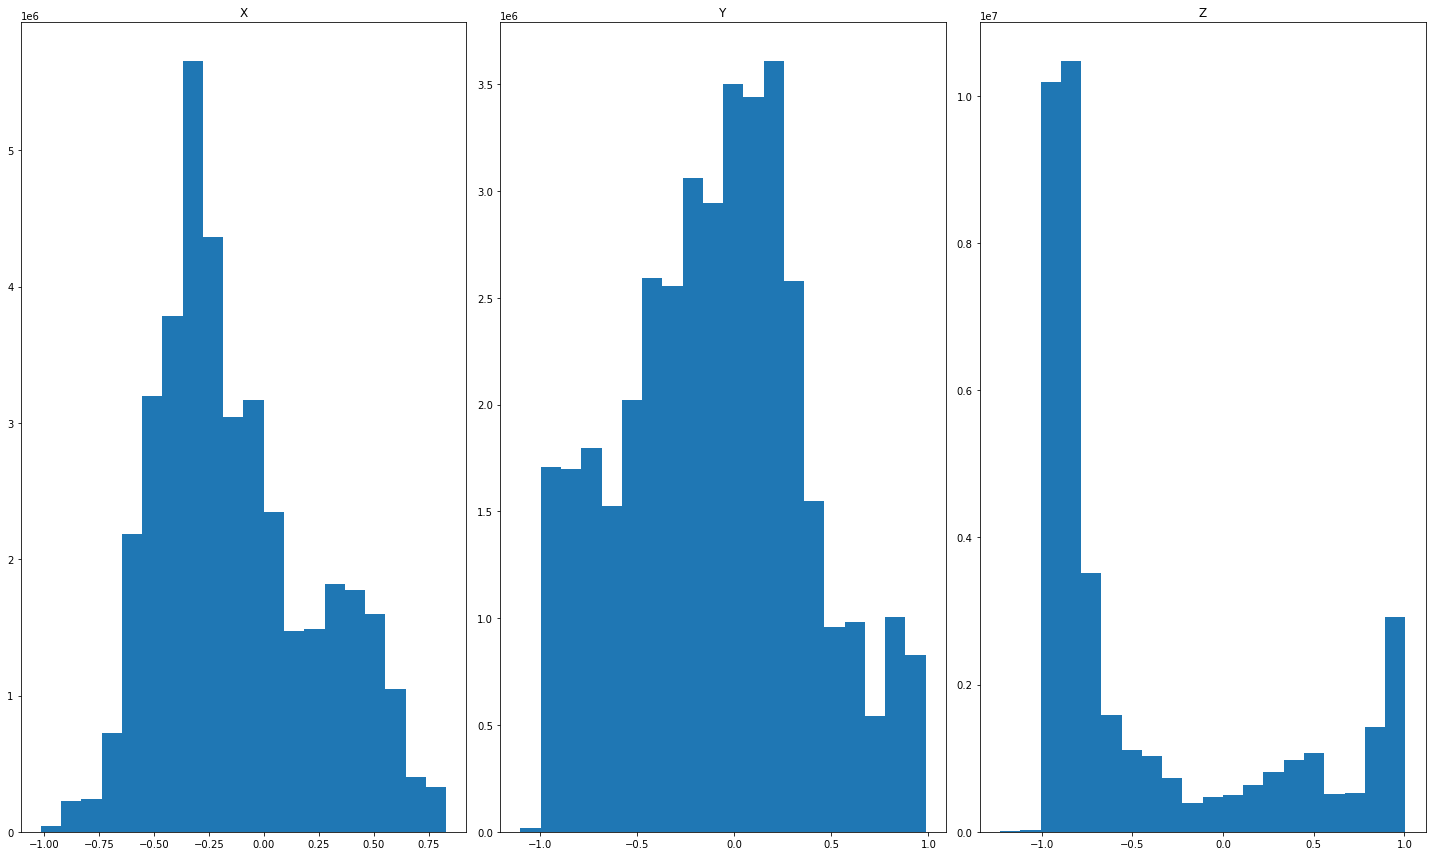

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 12))

axes[0].hist(accelerations['x'], bins=20)
axes[0].set_title('X')
axes[1].hist(accelerations['y'], bins=20)
axes[1].set_title('Y')
axes[2].hist(accelerations['z'], bins=20)
axes[2].set_title('Z')
plt.tight_layout()
plt.show()

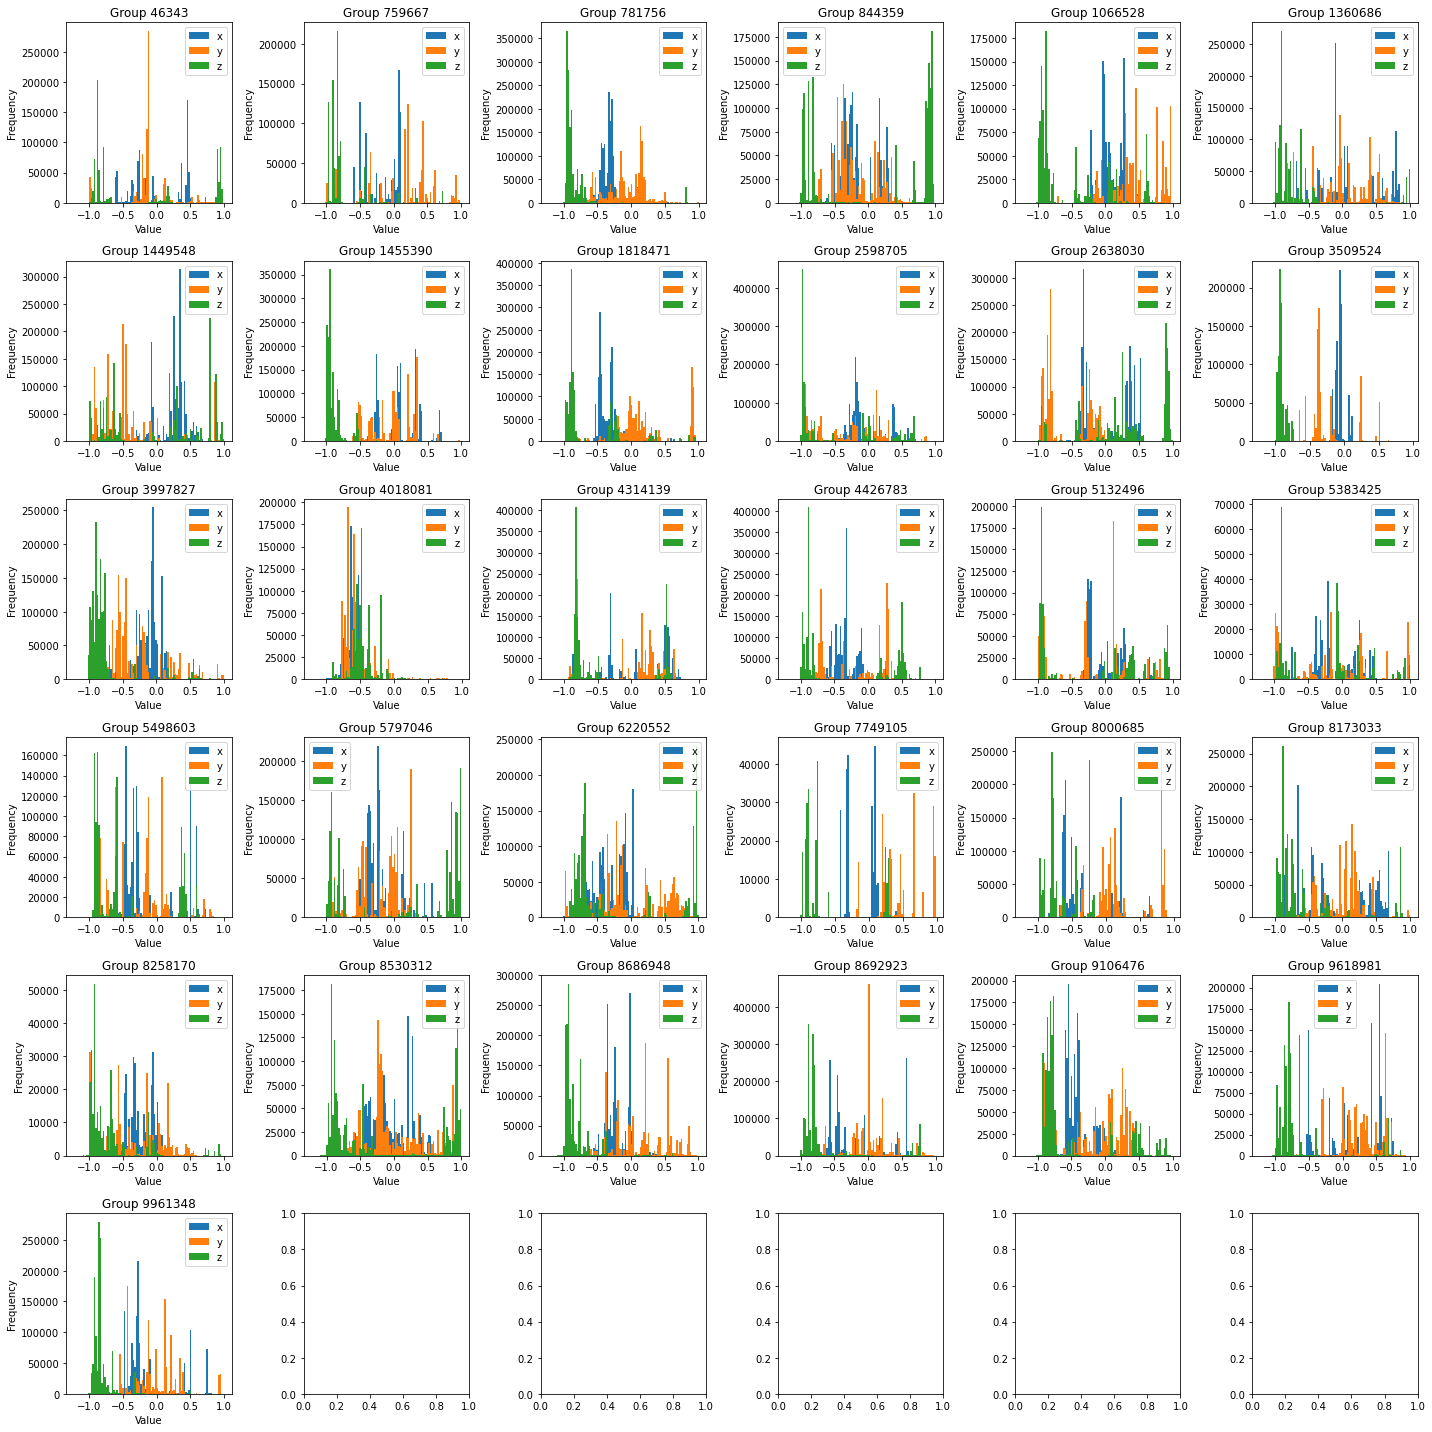

In [44]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
axe = axes.ravel()
for idx, (group_id, group_data) in enumerate(accelerations.groupby('ID')):
    ax = axe[idx]
    group_data[['x','y','z']].plot.hist(bins=100, ax=ax, title=f'Group {group_id}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## normalize accelerations with minmax

In [45]:
scaler = MinMaxScaler()
accelerations['x'] = scaler.fit_transform(accelerations[['x']])
accelerations['y'] = scaler.fit_transform(accelerations[['y']])
accelerations['z'] = scaler.fit_transform(accelerations[['z']])



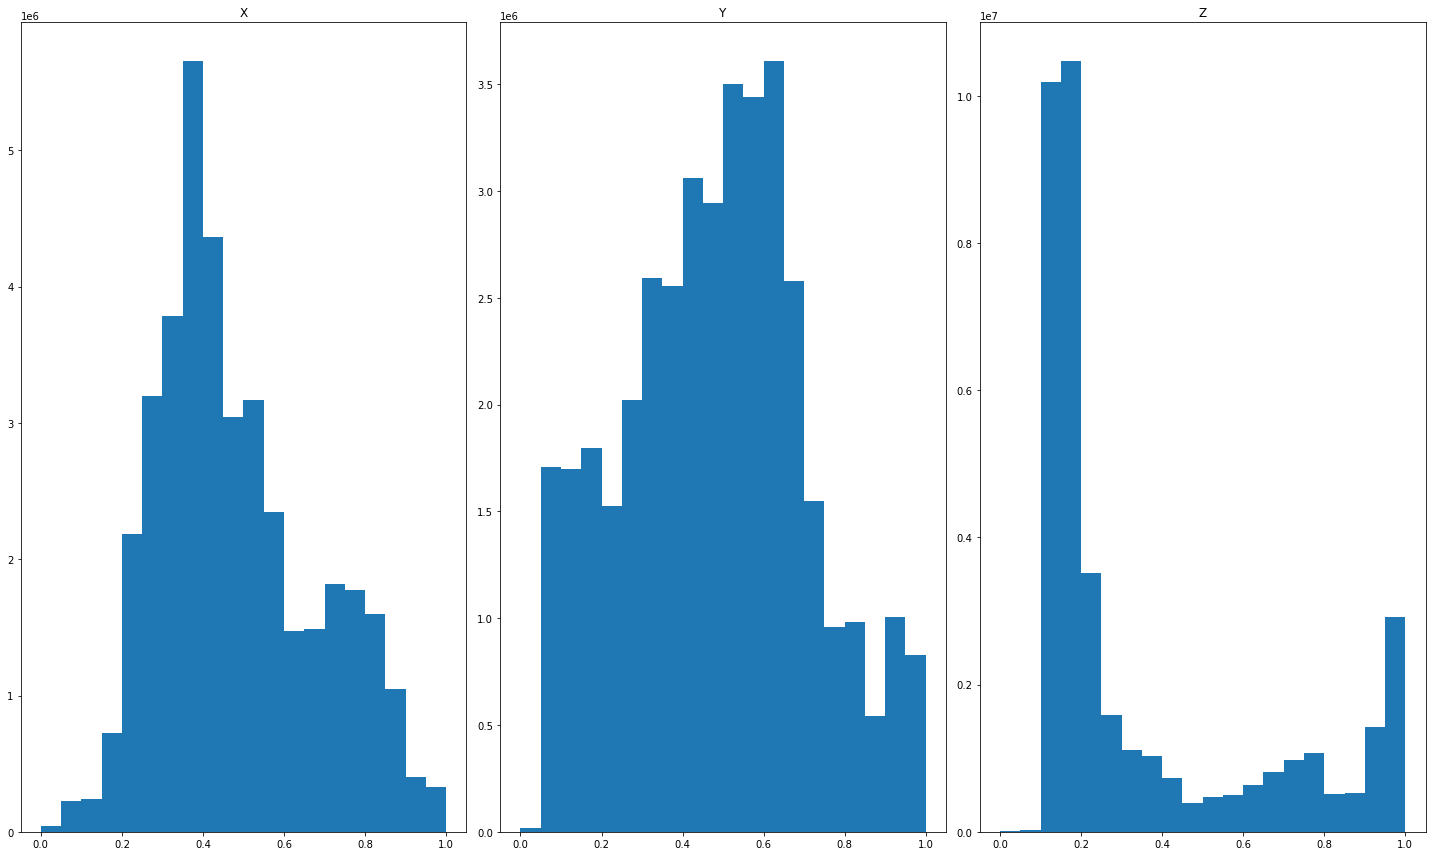

In [46]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 12))

axes[0].hist(accelerations['x'], bins=20)
axes[0].set_title('X')
axes[1].hist(accelerations['y'], bins=20)
axes[1].set_title('Y')
axes[2].hist(accelerations['z'], bins=20)
axes[2].set_title('Z')
plt.tight_layout()
plt.show()

## Save accelerations

In [15]:
accelerations.to_csv('accelerations.csv', index=False)

subject id: 46343
3295
plotted
plotting


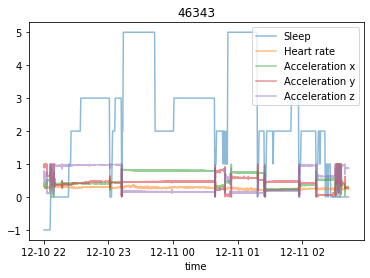

showed


In [155]:
#extra visualization
for _, (subject_id, subject_labels) in enumerate(labels.groupby('ID')):

    print('subject id: {}'.format(subject_id))
    start = subject_labels['time'].min()
    end = subject_labels['time'].max()
    
    subject_hr = heart_rates[
        (heart_rates['time'] >= start)
        & (heart_rates['time'] <= end)
        & (heart_rates['ID'] == subject_id)
    ]
    print(len(subject_hr))
    subject_acc = accelerations[(accelerations['ID'] == subject_id)]
    plt.figure()
    plt.plot(subject_labels['time'], subject_labels['sleep'], label='Sleep', alpha=0.5)
    plt.plot(subject_hr['time'], subject_hr['heart_rate'], label='Heart rate', alpha=0.5)
    plt.plot(subject_acc['time'], subject_acc['x'], label='Acceleration x', alpha=0.5)
    plt.plot(subject_acc['time'], subject_acc['y'], label='Acceleration y', alpha=0.5)
    plt.plot(subject_acc['time'], subject_acc['z'], label='Acceleration z', alpha=0.5)
    plt.xlabel('time')
    plt.title(subject_id)
    plt.legend()
    print('plotted')
    break
print('plotting')
plt.show()
print('showed')